<a href="https://colab.research.google.com/github/ds4ph-bme/homework-6-bbains31/blob/main/punk_tumor_adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Generate the data as below
2. Train a convolutional neural network to classify punks as diseased or not
   1. Create training and validation sets.
   2. Contrast in the sensitivity, specificity and accuracy in both sets.

In [2]:

import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses

## Open the image
imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
imgArray = np.asarray(img)

n = 10000

finalArray = np.empty((n, 24, 24, 3))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)
    c, d = 24 * j, 24 * (j + 1)
    idx = j + i * (100)
    finalArray[idx,:,:,:] = imgArray[a:b,c:d,:]


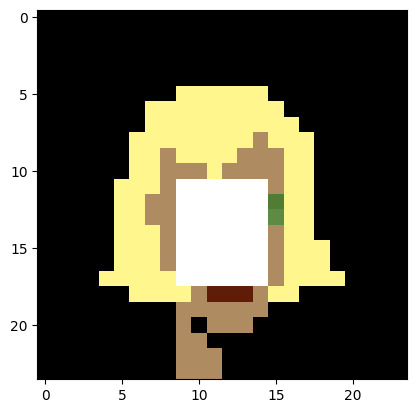

In [3]:

temp  =  finalArray[0,:,:,:].copy()

d2min, d2max = 9,14
d1min, d1max = 11,17

temp[d1min : (d1max + 1), d2min : (d2max + 1)] = 255

plt.imshow(temp.astype('uint8'))



In [4]:
cancerpunks = finalArray.copy()
label = np.zeros(n)

## Loop over the cryptopunks
for i in range(10000):
  flip = np.random.randint(0, 2)
  if flip is 1:
    label[i] = 1
    d1loc = np.random.randint(d1min, d1max + 1)
    d2loc = np.random.randint(d2min, d2max + 1)
    cancerpunks[i,d1loc,d2loc,:] = 255



<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-d1184c60a117>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if flip is 1:


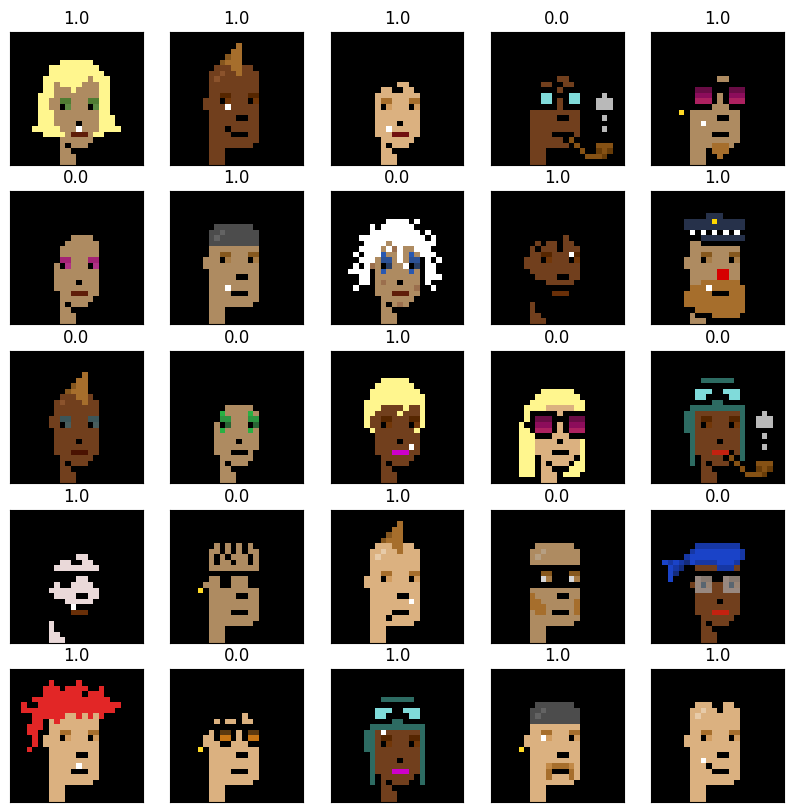

In [5]:
## plot some examples
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cancerpunks[i,:,:,:].astype('uint8'))
  plt.title(label[i])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(cancerpunks, label, test_size=0.2, random_state=42)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0 # Maximum pixel value is 255, min is 0
X_val = X_val.astype('float32') / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 3))) # Relu to introduce non-linearity to the model, 32 filters for shallow layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 64 filters for deeper layers, shape is not too complicated so not 128 or 256
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # Flatten into 1D array for input into dense layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # Sigmoid activation for binary classification task

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Test
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
y_pred_val = (model.predict(X_val) > 0.5).astype("int32")


def metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  return sensitivity, specificity, accuracy

# Training metrics
sens_train, spec_train, accu_train = metrics(y_train, y_pred_train)
# testing metrics
sens, spec, accu = metrics(y_val, y_pred_val)

print("Training Set Metrics:")
print("Sensitivity:", sens_train)
print("Specificity:", spec_train)
print("Accuracy:", accu_train)

print("\nValidation Set Metrics:")
print("Sensitivity:", sens)
print("Specificity:", spec)
print("Accuracy:", accu)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5655 - loss: 0.6655 - val_accuracy: 0.9115 - val_loss: 0.2371
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9130 - loss: 0.2088 - val_accuracy: 0.9575 - val_loss: 0.1058
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9566 - loss: 0.0961 - val_accuracy: 0.9530 - val_loss: 0.1064
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9593 - loss: 0.0870 - val_accuracy: 0.9615 - val_loss: 0.0819
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9737 - loss: 0.0631 - val_accuracy: 0.9735 - val_loss: 0.0630
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9772 - loss: 0.0568 - val_accuracy: 0.9740 - val_loss: 0.0607
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9805 - loss: 0.0501 - val_accuracy: 0.9545 - val_loss: 0.1075
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9867 - loss: 0.0349 - val_a